In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*Extração de dados das 3 fontes existentes que são: Vendas por KG, Venda R$ e Venda por Unidades*

Lembrando de alterar os NA por 0, visto a conferência de soma de todos os registros por area bateu com o TOTAL consolidado ou diferença na casa decimal, que pode ser justificado pela falta de presença de mais casas decimais, justificando a troca por 0.

Sem presença de dados duplicados

Limpar valores consolidados de total

Alteração no formato da tabela

Unificar os dois registros que possuem mais de um valor por area, fabricante e segmento, como a presença de mais de um registro para o Fornecedor 12.

Desconsiderar valores em reais quando o total de KG e total de unidades vendidas forem 0.

In [3]:
def read_data(name):
    df = pd.read_excel('C:/Users/victo/Documents/mondelez_case/src/Case Analytics_vSolutions.xlsx', sheet_name=name)
    df.fillna(0, inplace=True)
    df = df.loc[(df['Mercado']!= 'TOTAL BRASIL - INA')&(df['Fabricante']!= 'TOTAL')&(df['Segmento']!= 'TOTAL')]
    df.reset_index(inplace=True, drop=True)
    df = pd.melt(df, id_vars=['Mercado', 'Fabricante', 'Segmento'], var_name='Data', value_name=str(name).split(' ')[1])
    df = df.groupby(['Mercado', 'Fabricante', 'Segmento', 'Data'], as_index=False).sum()
    return df

Leitura das bases

In [4]:
data_KG = read_data('Vendas KG')
data_RS = read_data('Vendas R$')
data_Units = read_data('Vendas Unidades')

Validar se existem duplicatas

In [5]:
# validar dados duplicados
duplicate_rows = data_Units[data_Units.duplicated()]
print(f"Número de linhas duplicadas: {duplicate_rows.shape[0]}")

Número de linhas duplicadas: 0


Consolidar as 3 bases em uma só

In [6]:
df_consolidado = pd.merge(data_KG, data_RS, on=['Mercado', 'Fabricante', 'Segmento', 'Data'], how='left')
df_consolidado = pd.merge(df_consolidado, data_Units, on=['Mercado', 'Fabricante', 'Segmento', 'Data'], how='left')

Eliminar Erros de reais em relação a unidade e KG

In [7]:
df_consolidado.loc[(df_consolidado['KG'] == 0) & (df_consolidado['Unidades'] == 0), 'R$'] = 0

In [8]:
print(df_consolidado.sort_values(by=['R$'], inplace=True))
df_consolidado

None


,Mercado,Fabricante,Segmento,Data,KG,R$,Unidades
2276,AREA II - INA,FABRICANTE 8,CANDY BAR,2016-09-01,0.0,0.0,0.0
4388,AREA IV - INA,FABRICANTE 6,CONFEITO,2016-09-01,0.0,0.0,0.0
4389,AREA IV - INA,FABRICANTE 6,CONFEITO,2016-10-01,0.0,0.0,0.0
4390,AREA IV - INA,FABRICANTE 6,CONFEITO,2016-11-01,0.0,0.0,0.0
42,AREA I - INA,FABRICANTE 1,CANDY BAR,2016-07-01,0.0,0.0,0.0
...,...,...,...,...,...,...,...
3063,AREA III - INA,FABRICANTE 5,BOMBOM,2016-04-01,1498.8,34195.7,5360.7
663,AREA I - INA,FABRICANTE 5,BOMBOM,2016-04-01,1371.1,35814.8,6750.9
3051,AREA III - INA,FABRICANTE 5,BOMBOM,2015-04-01,1984.4,38210.2,6325.1
6279,AREA VI - INA,FABRICANTE 12,BOMBOM,2016-04-01,1660.6,41204.4,5521.1


Criação do Ticket Médio

In [9]:
df_consolidado['Ticket Médio'] = df_consolidado['R$'] / df_consolidado['Unidades']

Preço por KG

In [10]:
df_consolidado['Preço por KG'] = df_consolidado['R$'] / df_consolidado['KG']

Peso Médio por unidade

In [11]:
df_consolidado['Peso Médio'] = df_consolidado['KG'] / df_consolidado['Unidades']

Mostrar estrutura final

In [12]:
df_consolidado.head(5)

,Mercado,Fabricante,Segmento,Data,KG,R$,Unidades,Ticket Médio,Preço por KG,Peso Médio
2276,AREA II - INA,FABRICANTE 8,CANDY BAR,2016-09-01,0.0,0.0,0.0,NaN,NaN,NaN
4388,AREA IV - INA,FABRICANTE 6,CONFEITO,2016-09-01,0.0,0.0,0.0,NaN,NaN,NaN
4389,AREA IV - INA,FABRICANTE 6,CONFEITO,2016-10-01,0.0,0.0,0.0,NaN,NaN,NaN
4390,AREA IV - INA,FABRICANTE 6,CONFEITO,2016-11-01,0.0,0.0,0.0,NaN,NaN,NaN
42,AREA I - INA,FABRICANTE 1,CANDY BAR,2016-07-01,0.0,0.0,0.0,NaN,NaN,NaN


Valor de Faturamento em 2015

In [56]:
(df_consolidado.loc[df_consolidado['Data'] < '2016-01-01', 'R$'].sum())

np.float64(6916129.9)

Valor de Faturamento em 2016

In [57]:
(df_consolidado.loc[df_consolidado['Data'] >= '2016-01-01', 'R$'].sum())

np.float64(7134671.0)

Overview DataFrame

In [15]:
df_consolidado.drop(columns=['Data']).describe()

c:\Users\victo\Documents\mondelez_case\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,KG,R$,Unidades,Ticket Médio,Preço por KG,Peso Médio
count,8496.000000,8496.000000,8496.000000,7455.000000,7455.000000,7455.000000
mean,43.893150,1653.813665,555.040219,5.248731,inf,0.079072
std,112.462523,3477.860955,1083.306099,6.598694,NaN,0.071200
min,0.000000,0.000000,0.000000,0.115216,8.000000,0.000000
25%,0.300000,18.200000,3.300000,1.896584,35.508332,0.028864
50%,4.100000,223.500000,83.000000,3.243880,48.587143,0.058421
75%,30.425000,1707.975000,583.675000,5.255815,76.000000,0.111111
max,2553.600000,50937.500000,10545.100000,51.000000,inf,0.803279


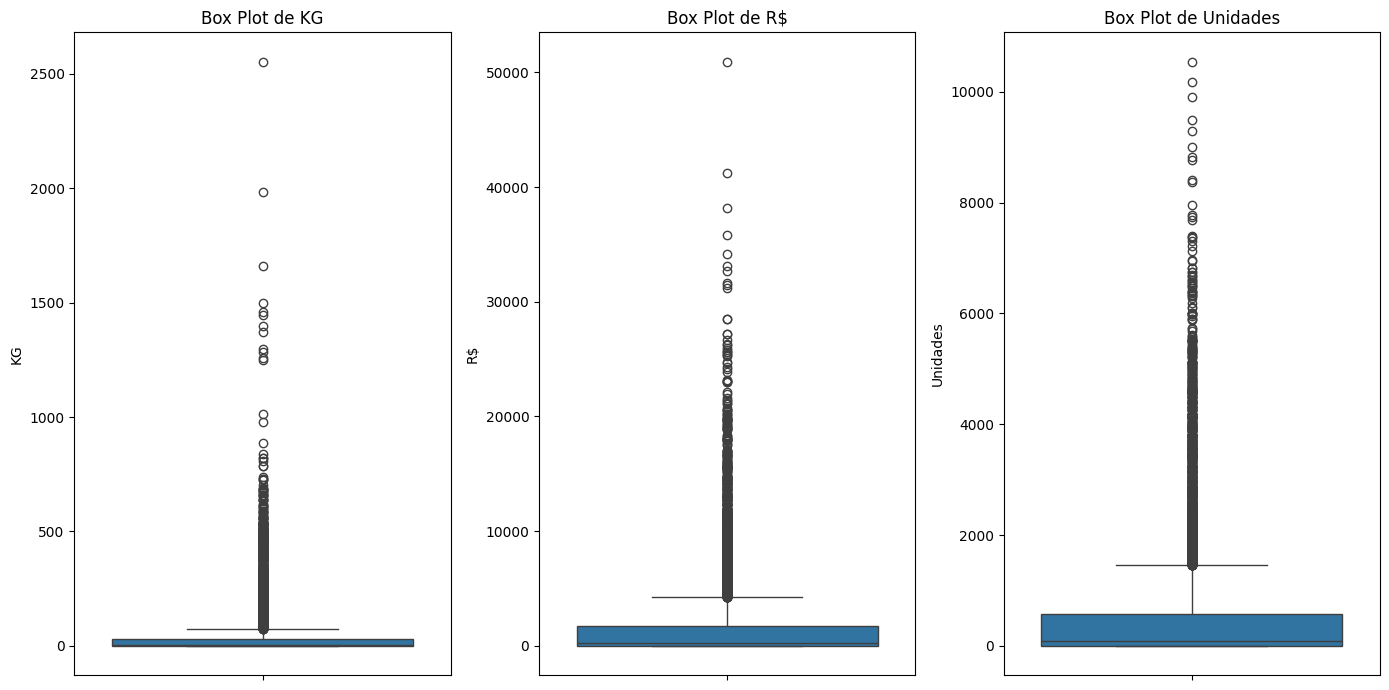

In [16]:
import seaborn as sns

# Configurar o tamanho da figura
plt.figure(figsize=(14, 7))

# Criar um subplot para cada variável
plt.subplot(1, 3, 1)
sns.boxplot(y=df_consolidado['KG'])
plt.title('Box Plot de KG')

plt.subplot(1, 3, 2)
sns.boxplot(y=df_consolidado['R$'])
plt.title('Box Plot de R$')

plt.subplot(1, 3, 3)
sns.boxplot(y=df_consolidado['Unidades'])
plt.title('Box Plot de Unidades')

# Ajustar o layout
plt.tight_layout()
plt.show()

In [17]:
df_consolidado.sort_values(by='Unidades', ascending=False).head(10)

,Mercado,Fabricante,Segmento,Data,KG,R$,Unidades,Ticket Médio,Preço por KG,Peso Médio
697,AREA I - INA,FABRICANTE 5,FORMATO VARIADO,2015-02-01,168.7,7276.5,10545.1,0.690036,43.132780,0.015998
698,AREA I - INA,FABRICANTE 5,FORMATO VARIADO,2015-03-01,162.7,7056.9,10169.9,0.693901,43.373694,0.015998
699,AREA I - INA,FABRICANTE 5,FORMATO VARIADO,2015-04-01,158.6,6875.3,9912.8,0.693578,43.349937,0.016000
696,AREA I - INA,FABRICANTE 5,FORMATO VARIADO,2015-01-01,151.8,6589.7,9485.0,0.694750,43.410408,0.016004
700,AREA I - INA,FABRICANTE 5,FORMATO VARIADO,2015-05-01,148.8,6468.4,9300.5,0.695489,43.470430,0.015999
703,AREA I - INA,FABRICANTE 5,FORMATO VARIADO,2015-08-01,144.0,6465.2,8999.6,0.718387,44.897222,0.016001
704,AREA I - INA,FABRICANTE 5,FORMATO VARIADO,2015-09-01,141.0,6360.4,8814.7,0.721567,45.109220,0.015996
7035,AREA VI - INA,FABRICANTE 7,BOMBOM,2015-04-01,1259.1,32655.7,8764.2,3.726033,25.935748,0.143664
702,AREA I - INA,FABRICANTE 5,FORMATO VARIADO,2015-07-01,134.4,5918.9,8401.6,0.704497,44.039435,0.015997
705,AREA I - INA,FABRICANTE 5,FORMATO VARIADO,2015-10-01,134.0,6244.9,8373.3,0.745811,46.603731,0.016003


In [18]:
df_consolidado['KG'].sum()

np.float64(372916.19999999995)

In [19]:
df_consolidado['R$'].sum()

np.float64(14050800.9)

In [20]:
df_consolidado['Unidades'].sum()

np.float64(4715621.699999999)

Alterar o formato do mês

In [21]:
#df_consolidado['Data'] = pd.to_datetime(df_consolidado['Data']).dt.strftime('%m-%Y')

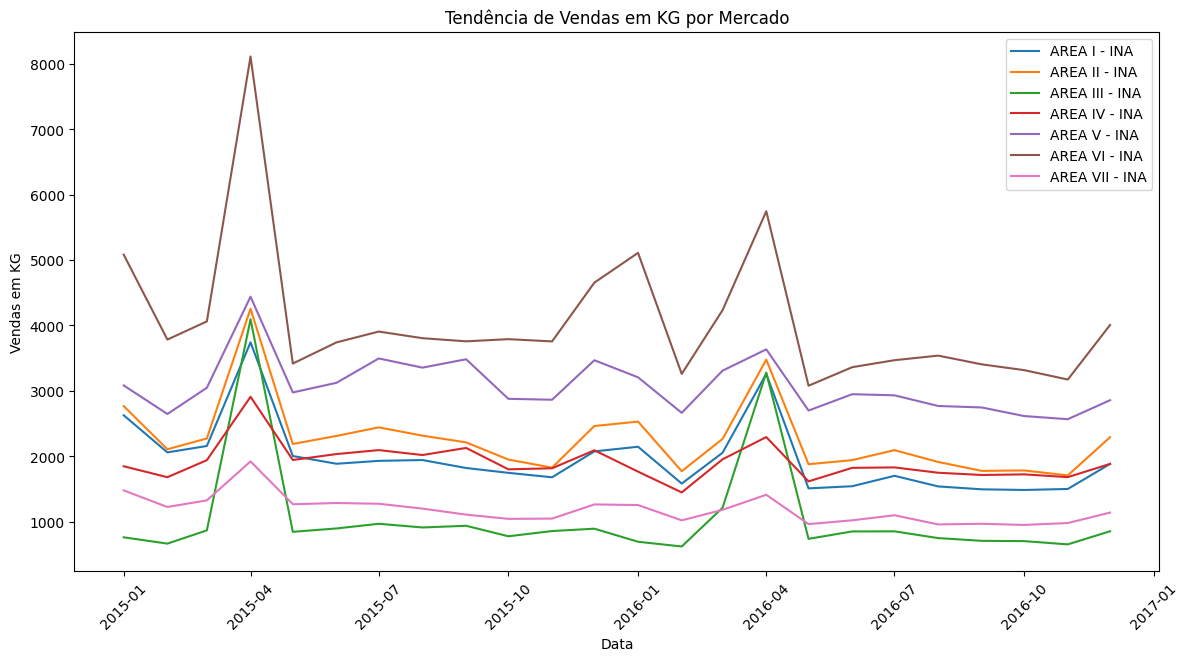

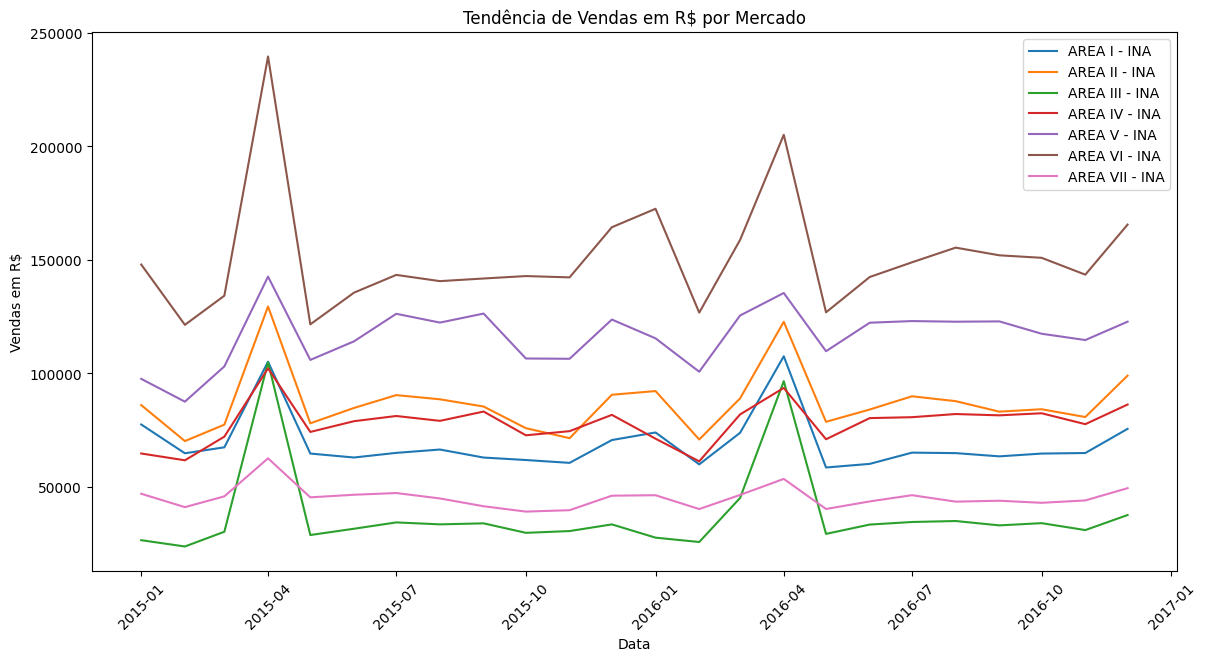

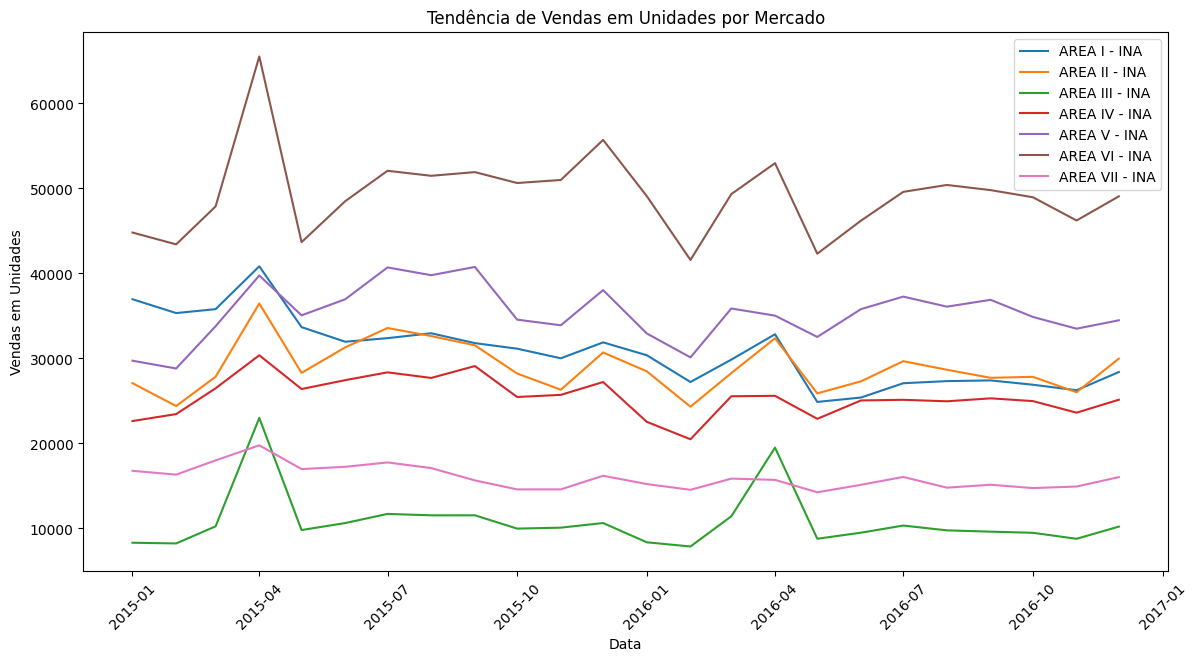

In [22]:
# Agrupar dados por Data e Mercado e somar as vendas
df_grouped = df_consolidado.groupby(['Data', 'Mercado']).sum().reset_index()

# Plotar as vendas em KG ao longo do tempo para cada mercado
plt.figure(figsize=(14, 7))
for mercado in df_grouped['Mercado'].unique():
    df_mercado = df_grouped[df_grouped['Mercado'] == mercado]
    plt.plot(df_mercado['Data'], df_mercado['KG'], label=mercado)

plt.xlabel('Data')
plt.xticks(rotation=45)
plt.ylabel('Vendas em KG')
plt.title('Tendência de Vendas em KG por Mercado')
plt.legend()
plt.show()

# Agrupar dados por Data e Mercado e somar as vendas
df_grouped = df_consolidado.groupby(['Data', 'Mercado']).sum().reset_index()

# Plotar as vendas em KG ao longo do tempo para cada mercado
plt.figure(figsize=(14, 7))
for mercado in df_grouped['Mercado'].unique():
    df_mercado = df_grouped[df_grouped['Mercado'] == mercado]
    plt.plot(df_mercado['Data'], df_mercado['R$'], label=mercado)

plt.xlabel('Data')
plt.xticks(rotation=45)
plt.ylabel('Vendas em R$')
plt.title('Tendência de Vendas em R$ por Mercado')
plt.legend()
plt.show()

# Agrupar dados por Data e Mercado e somar as vendas
df_grouped = df_consolidado.groupby(['Data', 'Mercado']).sum().reset_index()

# Plotar as vendas em KG ao longo do tempo para cada mercado
plt.figure(figsize=(14, 7))
for mercado in df_grouped['Mercado'].unique():
    df_mercado = df_grouped[df_grouped['Mercado'] == mercado]
    plt.plot(df_mercado['Data'], df_mercado['Unidades'], label=mercado)

plt.xlabel('Data')
plt.xticks(rotation=45)
plt.ylabel('Vendas em Unidades')
plt.title('Tendência de Vendas em Unidades por Mercado')
plt.legend()
plt.show()

Sazonalidade com forte demanda em Abril, época de páscoa e maior queda entre janeiro e fevereiro

Área VI com maior relevância

Possibilidades: Valor por Kilo com baixo valor. X
                Ter os maiores fornecedores - 
                Vender os melhores segmentos - Vende mais por segmento, sendo os principais TABLETE e BOMBOM. mas sem exclusividade

Valor abaixo mostra que a área VI possui um dos maiores valores por KG, ou seja, essa alta demanda não é correlacionada a isso

In [23]:
# Agrupar dados por Data e Mercado e calcular a média do Preço por KG
df_ticket_medio = df_consolidado.groupby(['Data', 'Mercado']).apply(lambda x: (x['R$'].sum() / x['KG'].sum())).reset_index(name='R$')

# Exibir a tabela resultante
df_ticket_medio =  df_ticket_medio.sort_values(by='R$', ascending=False)
print(df_ticket_medio)

          Data         Mercado         R$
149 2016-10-01  AREA III - INA  48.545002
150 2016-10-01   AREA IV - INA  47.851616
143 2016-09-01   AREA IV - INA  47.584578
156 2016-11-01  AREA III - INA  47.564001
155 2016-11-01   AREA II - INA  47.315500
..         ...             ...        ...
26  2015-04-01   AREA VI - INA  29.518984
107 2016-04-01  AREA III - INA  29.453567
5   2015-01-01   AREA VI - INA  29.109266
21  2015-04-01    AREA I - INA  28.099920
23  2015-04-01  AREA III - INA  25.616112

[168 rows x 3 columns]


C:\Users\victo\AppData\Local\Temp\ipykernel_11416\3399702374.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ticket_medio = df_consolidado.groupby(['Data', 'Mercado']).apply(lambda x: (x['R$'].sum() / x['KG'].sum())).reset_index(name='R$')


In [24]:
# Agrupar dados por Data e Mercado e calcular a média do Preço por KG
df_ticket_medio = df_consolidado.groupby(['Fabricante']).apply(lambda x: (x['R$'].sum() / x['KG'].sum())).reset_index(name='R$')

# Exibir a tabela resultante
df_ticket_medio =  df_ticket_medio.sort_values(by='R$', ascending=False)

C:\Users\victo\AppData\Local\Temp\ipykernel_11416\2596651152.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_ticket_medio = df_consolidado.groupby(['Fabricante']).apply(lambda x: (x['R$'].sum() / x['KG'].sum())).reset_index(name='R$')


In [25]:
teste = df_consolidado.loc[(df_consolidado['Mercado']=='AREA III - INA')&(df_consolidado['Data']=='2016-04-01')]

In [26]:
calc = teste['R$'].sum() / teste['KG'].sum()

In [27]:
calc

np.float64(29.45356707317073)

Saber o faturamento por Mercado e Segmento

In [28]:
segmentos_por_mercado = df_consolidado.groupby(['Mercado', 'Segmento'])['R$'].sum().reset_index()
segmentos_por_mercado.sort_values(by='R$', ascending=False)

,Mercado,Segmento,R$
41,AREA VI - INA,TABLETE,1441708.5
34,AREA V - INA,TABLETE,1035659.8
35,AREA VI - INA,BOMBOM,959092.8
28,AREA V - INA,BOMBOM,766632.5
27,AREA IV - INA,TABLETE,755123.9
13,AREA II - INA,TABLETE,748680.7
7,AREA II - INA,BOMBOM,668934.7
0,AREA I - INA,BOMBOM,611864.7
40,AREA VI - INA,SNACK,522308.3
33,AREA V - INA,SNACK,474019.9


In [29]:
fabricante_por_mercado = df_consolidado.groupby(['Mercado', 'Fabricante'])['R$'].sum().reset_index()
#fabricante_por_mercado12 = fabricante_por_mercado.loc[fabricante_por_mercado['Fabricante']=='FABRICANTE 7']
fabricante_por_mercado.sort_values(by=['R$'], ascending=False).head(10)

,Mercado,Fabricante,R$
75,AREA VI - INA,FABRICANTE 7,1385995.2
62,AREA V - INA,FABRICANTE 7,1100630.4
68,AREA VI - INA,FABRICANTE 12,1050684.1
55,AREA V - INA,FABRICANTE 12,758310.0
49,AREA IV - INA,FABRICANTE 7,678566.7
23,AREA II - INA,FABRICANTE 7,638474.2
8,AREA I - INA,FABRICANTE 5,606926.1
21,AREA II - INA,FABRICANTE 5,597857.5
88,AREA VII - INA,FABRICANTE 7,497718.4
10,AREA I - INA,FABRICANTE 7,472032.4


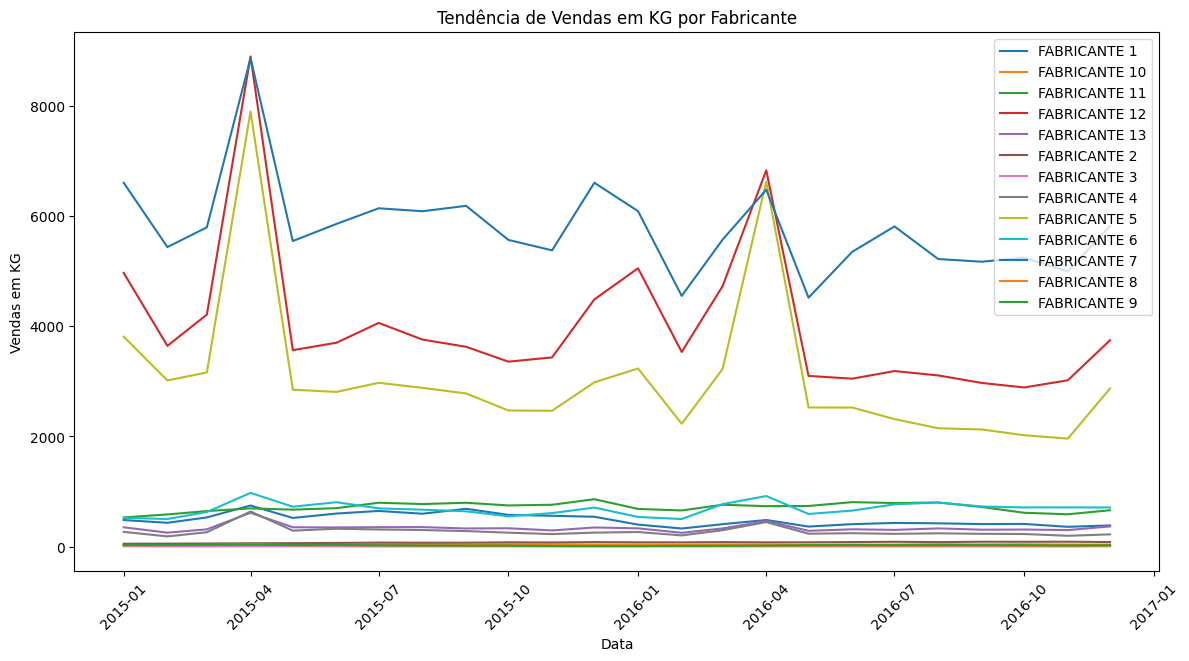

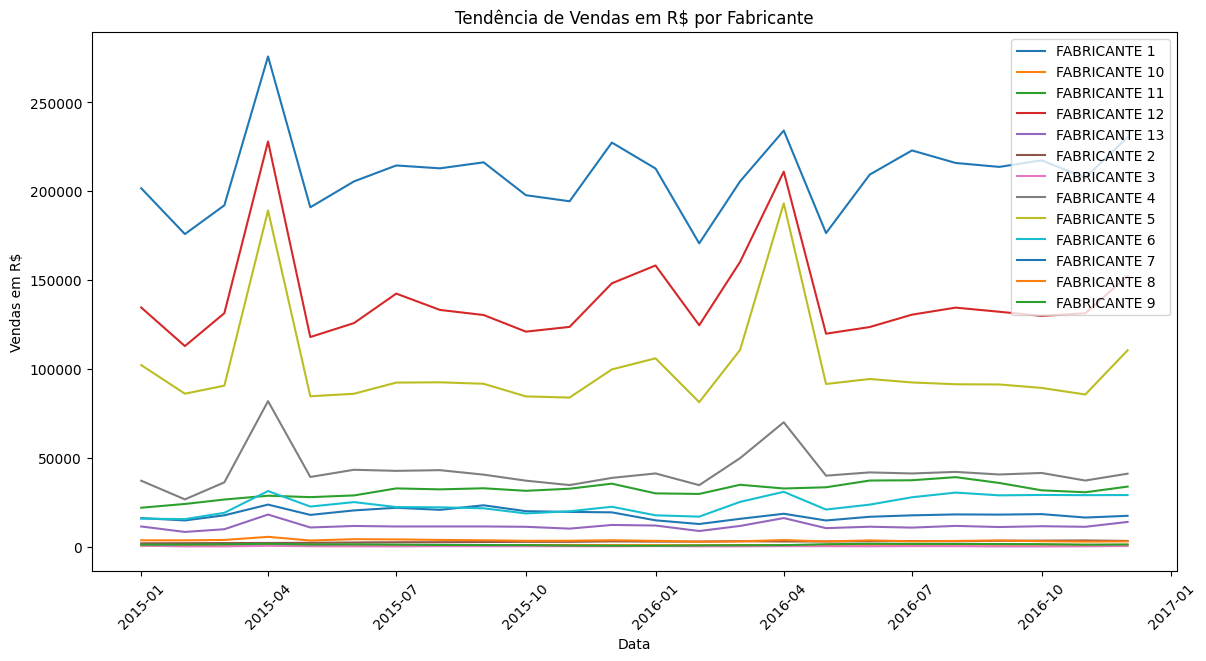

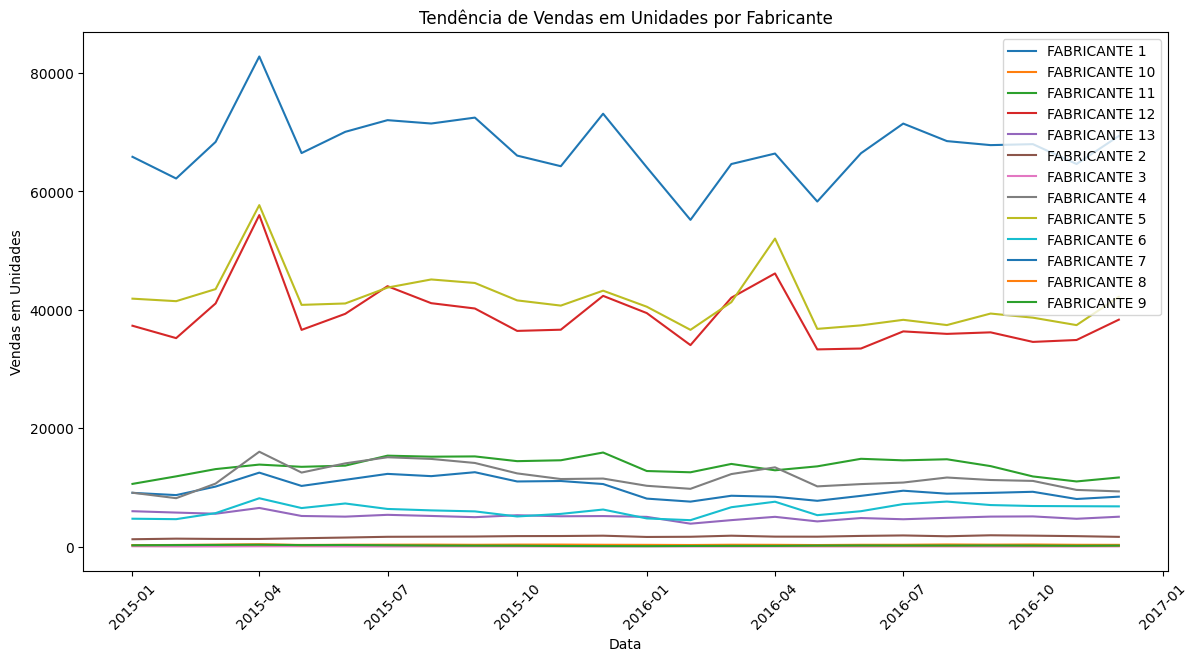

In [30]:
# Agrupar dados por Data e Fabricante e somar as vendas
df_grouped_fabricante = df_consolidado.groupby(['Data', 'Fabricante']).sum().reset_index()

# Plotar as vendas em KG ao longo do tempo para cada fabricante
plt.figure(figsize=(14, 7))
for fabricante in df_grouped_fabricante['Fabricante'].unique():
    df_fabricante = df_grouped_fabricante[df_grouped_fabricante['Fabricante'] == fabricante]
    plt.plot(df_fabricante['Data'], df_fabricante['KG'], label=fabricante)

plt.xlabel('Data')
plt.xticks(rotation=45)
plt.ylabel('Vendas em KG')
plt.title('Tendência de Vendas em KG por Fabricante')
plt.legend()
plt.show()

# Plotar as vendas em R$ ao longo do tempo para cada fabricante
plt.figure(figsize=(14, 7))
for fabricante in df_grouped_fabricante['Fabricante'].unique():
    df_fabricante = df_grouped_fabricante[df_grouped_fabricante['Fabricante'] == fabricante]
    plt.plot(df_fabricante['Data'], df_fabricante['R$'], label=fabricante)

plt.xlabel('Data')
plt.xticks(rotation=45)
plt.ylabel('Vendas em R$')
plt.title('Tendência de Vendas em R$ por Fabricante')
plt.legend()
plt.show()

# Plotar as vendas em Unidades ao longo do tempo para cada fabricante
plt.figure(figsize=(14, 7))
for fabricante in df_grouped_fabricante['Fabricante'].unique():
    df_fabricante = df_grouped_fabricante[df_grouped_fabricante['Fabricante'] == fabricante]
    plt.plot(df_fabricante['Data'], df_fabricante['Unidades'], label=fabricante)

plt.xlabel('Data')
plt.xticks(rotation=45)
plt.ylabel('Vendas em Unidades')
plt.title('Tendência de Vendas em Unidades por Fabricante')
plt.legend()
plt.show()

Comportamento entre fabricantes segue com uma demanda correlacionada entre as vendas, com o destaque maior para os fornecedores 12, 7 e 5.

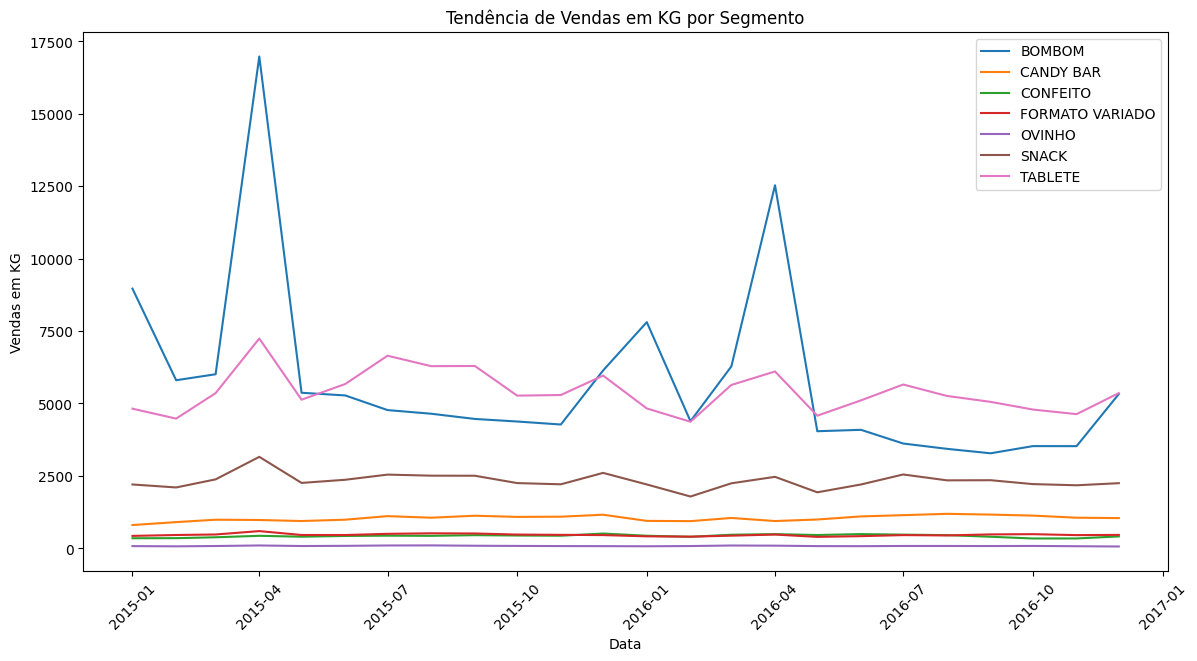

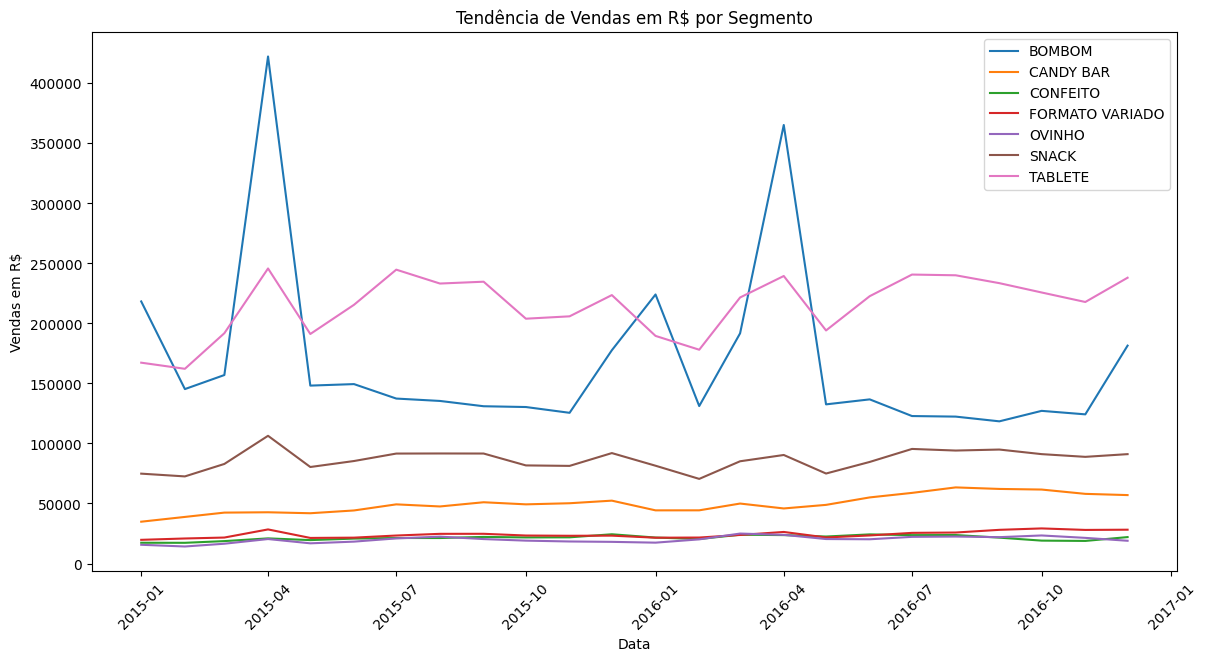

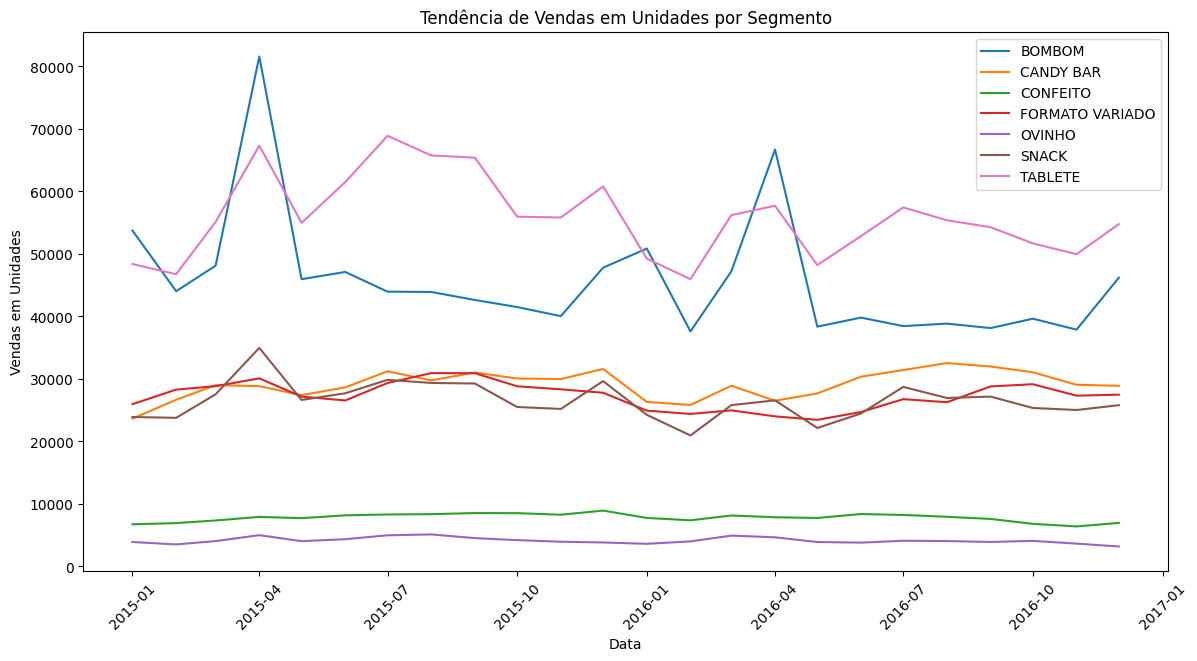

In [31]:
# Agrupar dados por Data e Segmento e somar as vendas
df_grouped_segmento = df_consolidado.groupby(['Data', 'Segmento']).sum().reset_index()

# Plotar as vendas em KG ao longo do tempo para cada segmento
plt.figure(figsize=(14, 7))
for segmento in df_grouped_segmento['Segmento'].unique():
    df_segmento = df_grouped_segmento[df_grouped_segmento['Segmento'] == segmento]
    plt.plot(df_segmento['Data'], df_segmento['KG'], label=segmento)

plt.xlabel('Data')
plt.xticks(rotation=45)
plt.ylabel('Vendas em KG')
plt.title('Tendência de Vendas em KG por Segmento')
plt.legend()
plt.show()

# Plotar as vendas em R$ ao longo do tempo para cada segmento
plt.figure(figsize=(14, 7))
for segmento in df_grouped_segmento['Segmento'].unique():
    df_segmento = df_grouped_segmento[df_grouped_segmento['Segmento'] == segmento]
    plt.plot(df_segmento['Data'], df_segmento['R$'], label=segmento)

plt.xlabel('Data')
plt.xticks(rotation=45)
plt.ylabel('Vendas em R$')
plt.title('Tendência de Vendas em R$ por Segmento')
plt.legend()
plt.show()

# Plotar as vendas em Unidades ao longo do tempo para cada segmento
plt.figure(figsize=(14, 7))
for segmento in df_grouped_segmento['Segmento'].unique():
    df_segmento = df_grouped_segmento[df_grouped_segmento['Segmento'] == segmento]
    plt.plot(df_segmento['Data'], df_segmento['Unidades'], label=segmento)

plt.xlabel('Data')
plt.xticks(rotation=45)
plt.ylabel('Vendas em Unidades')
plt.title('Tendência de Vendas em Unidades por Segmento')
plt.legend()
plt.show()

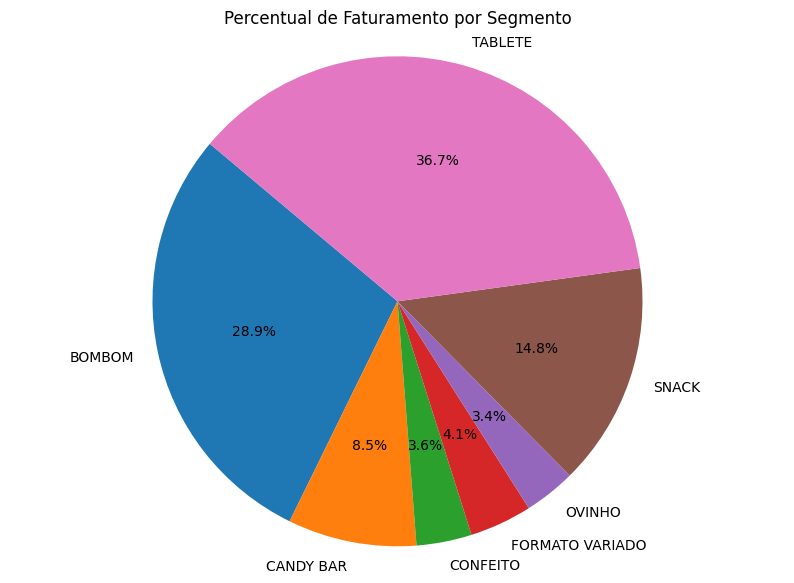

In [32]:
segmentos_faturamento = df_consolidado.groupby(['Segmento'])['R$'].sum().reset_index()
# Calcular a porcentagem de faturamento por segmento
segmentos_faturamento['Percentual'] = (segmentos_faturamento['R$'] / segmentos_faturamento['R$'].sum()) * 100

# Plotar o gráfico de pizza
plt.figure(figsize=(10, 7))
plt.pie(segmentos_faturamento['Percentual'], labels=segmentos_faturamento['Segmento'], autopct='%1.1f%%', startangle=140)
plt.title('Percentual de Faturamento por Segmento')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

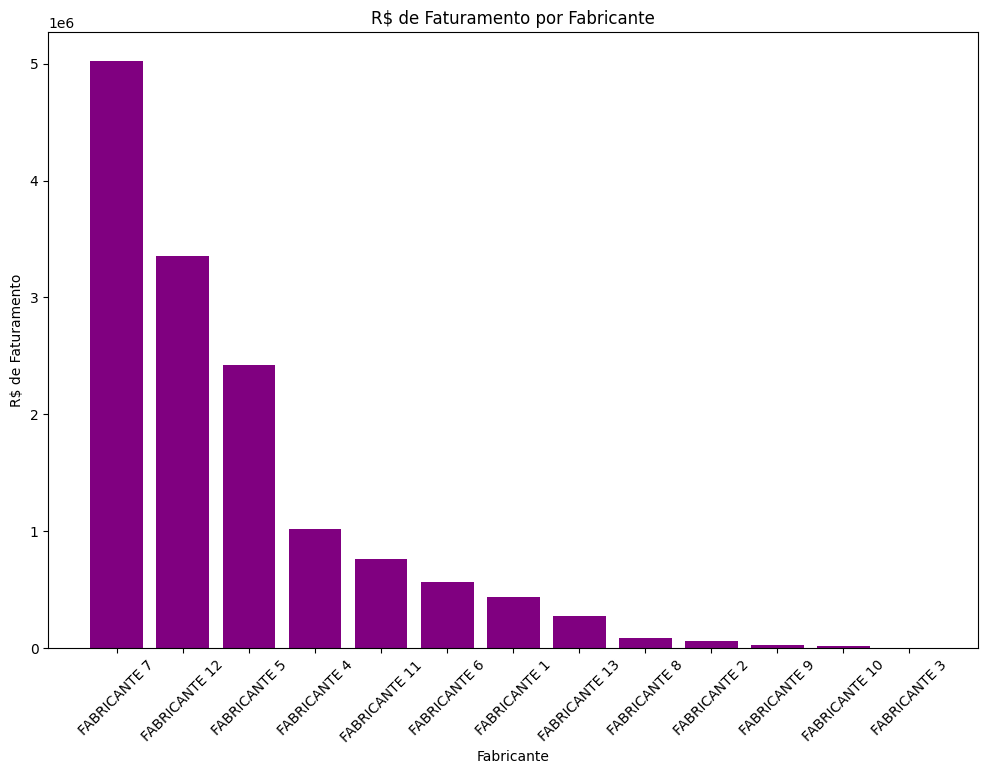

In [48]:
fornecedores_faturamento = df_consolidado.groupby(['Fabricante'])['R$'].sum().reset_index()

# Calcular a porcentagem de faturamento por segmento
fornecedores_faturamento['Percentual'] = (fornecedores_faturamento['R$'] / df_consolidado['R$'].sum()) * 100

# Ordenar os fabricantes pelo percentual de faturamento em ordem decrescente
fornecedores_faturamento = fornecedores_faturamento.sort_values(by='R$', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(fornecedores_faturamento['Fabricante'], fornecedores_faturamento['R$'], color='purple')
plt.xlabel('Fabricante')
plt.ylabel('R$ de Faturamento')
plt.title('R$ de Faturamento por Fabricante')
plt.xticks(rotation=45)
plt.show()

In [51]:
fornecedores_faturamento.sort_values(by='R$', ascending=True).head(13)

,Fabricante,R$,Percentual
6,FABRICANTE 3,5032.8,0.035819
1,FABRICANTE 10,20901.4,0.148756
12,FABRICANTE 9,26065.8,0.185511
5,FABRICANTE 2,64858.3,0.461599
11,FABRICANTE 8,82686.2,0.588480
4,FABRICANTE 13,276844.9,1.970314
0,FABRICANTE 1,433329.3,3.084019
9,FABRICANTE 6,564673.9,4.018802
2,FABRICANTE 11,760411.3,5.411872
7,FABRICANTE 4,1020849.6,7.265419


In [35]:
# Selecionar as colunas relevantes para a correlação
df_corr = df_consolidado[['Preço por KG', 'Segmento', 'Unidades', 'Fabricante', 'R$']]

# Converter a coluna 'Segmento' para valores numéricos usando o método 'factorize'
df_corr['Segmento'] = pd.factorize(df_corr['Segmento'])[0]

df_corr['Fabricante'] = pd.factorize(df_corr['Fabricante'])[0]

# Calcular a correlação
correlation_matrix = df_corr.corr()

# Exibir a matriz de correlação
print(correlation_matrix)

              Preço por KG  Segmento  Unidades  Fabricante        R$
Preço por KG      1.000000  0.171171 -0.195841   -0.325319 -0.160245
Segmento          0.171171  1.000000  0.132580   -0.085518  0.254893
Unidades         -0.195841  0.132580  1.000000    0.282006  0.842528
Fabricante       -0.325319 -0.085518  0.282006    1.000000  0.224607
R$               -0.160245  0.254893  0.842528    0.224607  1.000000


C:\Users\victo\AppData\Local\Temp\ipykernel_11416\374000963.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['Segmento'] = pd.factorize(df_corr['Segmento'])[0]
C:\Users\victo\AppData\Local\Temp\ipykernel_11416\374000963.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['Fabricante'] = pd.factorize(df_corr['Fabricante'])[0]


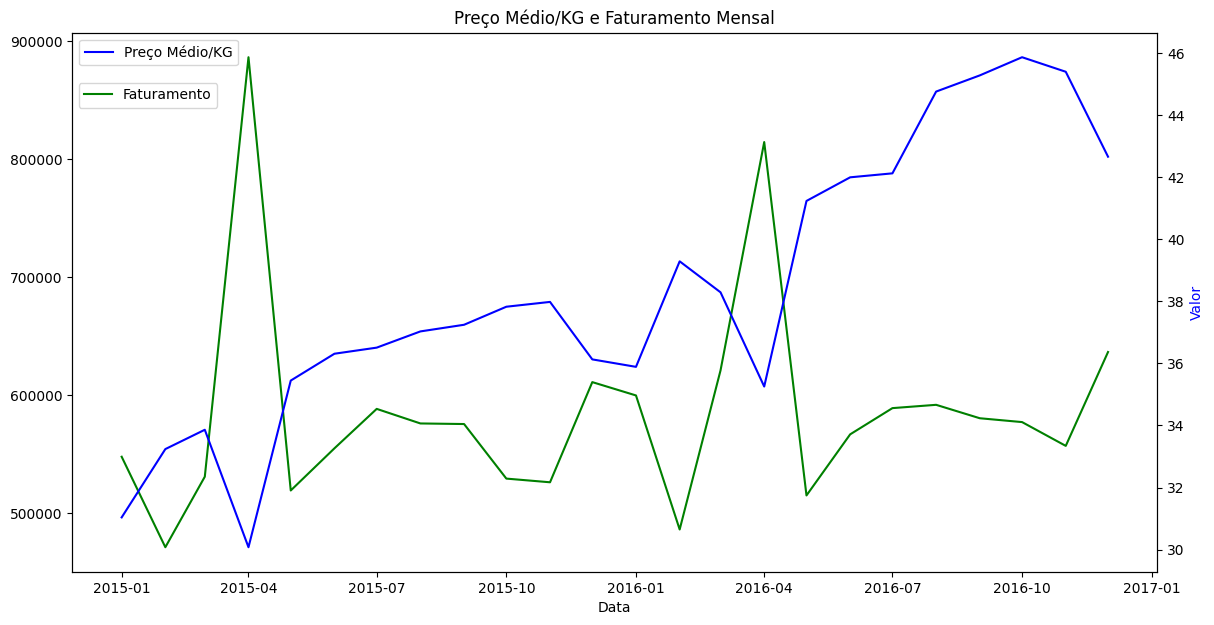

In [36]:
# Agrupar dados por Data e calcular a média do Preço Médio/KG e a soma do Faturamento
df_grouped = df_consolidado.groupby('Data').agg({'KG': 'sum', 'R$': 'sum'}).reset_index()

df_grouped['Preço Médio/KG'] = df_grouped['R$'] / df_grouped['KG']

# Plotar o gráfico de linha
plt.figure(figsize=(14, 7))
#plt.plot(df_grouped['Data'], df_grouped['Preço Médio/KG'], label='Preço Médio/KG', color='blue')
plt.plot(df_grouped['Data'], df_grouped['R$'], label='Faturamento', color='green')

plt.xlabel('Data')

# Criar um eixo secundário para o Preço Médio/KG
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(df_grouped['Data'], df_grouped['Preço Médio/KG'], label='Preço Médio/KG', color='blue')
ax2.set_ylabel('Preço Médio/KG', color='blue')
plt.xticks(rotation=45)
plt.ylabel('Valor')
plt.title('Preço Médio/KG e Faturamento Mensal')
#ax1.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
ax1.legend(loc=1, 
          bbox_to_anchor=(0.14,0.92),
          labelspacing=1,
          ncol=1, fontsize=10)
ax2.legend(loc='upper left', fontsize=8)
plt.legend()
plt.show()

                    Data  Total KG  Faturamento  Preço Médio/KG
Data            1.000000 -0.391637     0.075300        0.905114
Total KG       -0.391637  1.000000     0.877479       -0.663966
Faturamento     0.075300  0.877479     1.000000       -0.239022
Preço Médio/KG  0.905114 -0.663966    -0.239022        1.000000


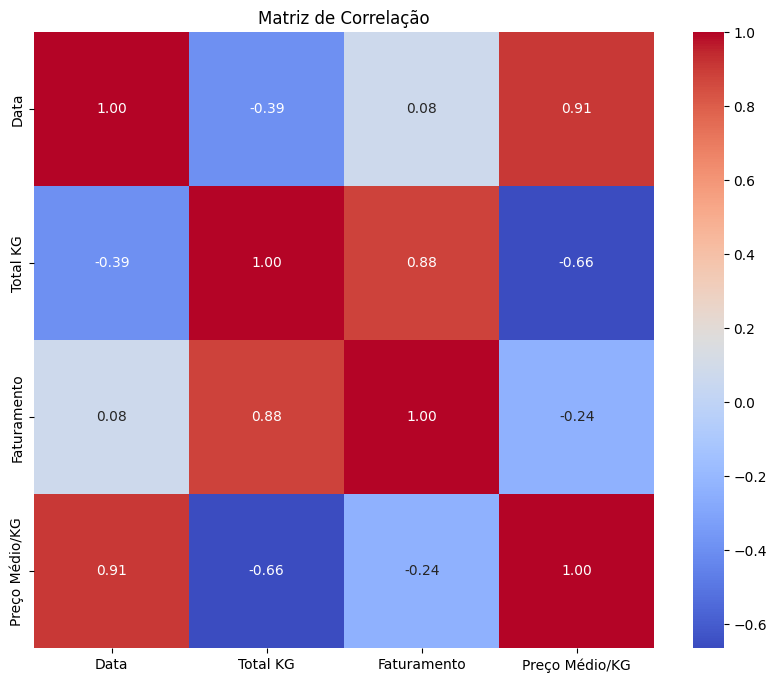

In [37]:
df_grouped.rename(columns={'R$': 'Faturamento'}, inplace=True)
df_grouped.rename(columns={'KG': 'Total KG'}, inplace=True)
# Calcular a correlação
correlation_matrix = df_grouped.corr()

# Exibir a matriz de correlação
print(correlation_matrix)

# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()